In [3]:
import os

os.listdir('.')

['.ipynb_checkpoints', 'data', 'exploracion.ipynb', 'README.md', 'results.md']

In [4]:
PATH = 'data'

os.listdir(PATH)

['jpeg224', 'sample_submission.csv', 'test.csv', 'train.csv']

In [6]:
import pandas as pd

train = pd.read_csv(f'{PATH}/train.csv')
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [8]:
imgs = os.listdir(f'{PATH}/jpeg224/train')
imgs[:5]

['ISIC_0015719.jpg',
 'ISIC_0052212.jpg',
 'ISIC_0068279.jpg',
 'ISIC_0074268.jpg',
 'ISIC_0074311.jpg']

In [9]:
test = pd.read_csv(f'{PATH}/test.csv')
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [10]:
sub = pd.read_csv(f'{PATH}/sample_submission.csv')
sub.head()

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0


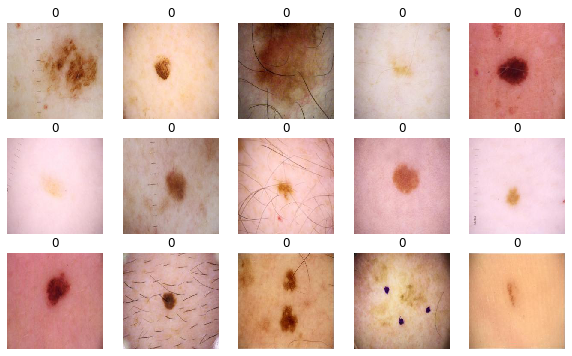

In [18]:
import matplotlib.pyplot as plt
from skimage import io
import random

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(train))
        name = train["image_name"].values[ix]
        img = io.imread(f'{PATH}/jpeg224/train/{name}.jpg')
        plt.imshow(img)
        label = train["target"].values[ix]
        plt.title(label)
        plt.axis(False)
plt.show()

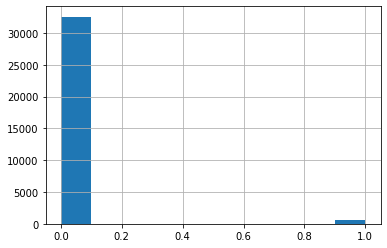

In [19]:
train['target'].hist()

In [20]:
train['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [21]:
1 - 584 / 32542

0.9820539610349702

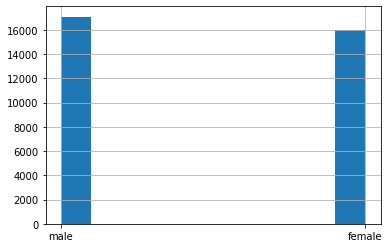

In [22]:
train['sex'].hist()

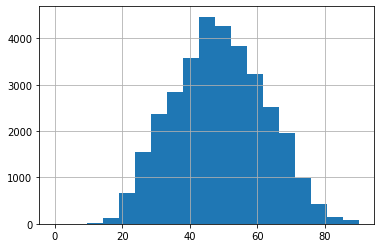

In [25]:
train['age_approx'].hist(bins=len(train['age_approx'].unique()))

In [24]:
train['age_approx'].value_counts()

45.0    4466
50.0    4270
55.0    3824
40.0    3576
60.0    3240
35.0    2850
65.0    2527
30.0    2358
70.0    1968
25.0    1544
75.0     981
20.0     655
80.0     419
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64

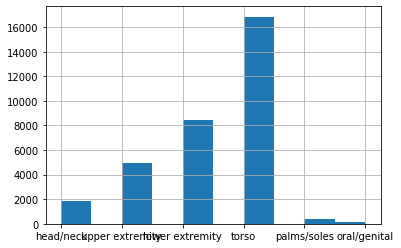

In [26]:
train['anatom_site_general_challenge'].hist()

In [28]:
train.shape, test.shape

((33126, 8), (10982, 5))

In [33]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(train, random_state=42, test_size=0.33, shuffle=True, stratify=train['target'])

train_split.shape, val_split.shape

((22194, 8), (10932, 8))

In [39]:
train_split.to_csv(f'{PATH}/train_split.csv', index=False)
val_split.to_csv(f'{PATH}/val_split.csv', index=False)

In [40]:
_, subset = train_test_split(train_split, random_state=42, test_size=0.1, shuffle=True, stratify=train_split['target'])
subset.shape

(2220, 8)

In [41]:
subset.to_csv(f'{PATH}/subset.csv', index=False)